**Data Loading and Exploration**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lifespan        1000 non-null   float64
 1   partType        1000 non-null   object 
 2   microstructure  1000 non-null   object 
 3   coolingRate     1000 non-null   int64  
 4   quenchTime      1000 non-null   float64
 5   forgeTime       1000 non-null   float64
 6   smallDefects    1000 non-null   int64  
 7   largeDefects    1000 non-null   int64  
 8   sliverDefects   1000 non-null   int64  
 9   seedLocation    1000 non-null   object 
 10  castType        1000 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 86.1+ KB
None
          Lifespan  coolingRate   quenchTime    forgeTime  smallDefects  \
count  1000.000000  1000.000000  1000.000000  1000.000000    1000.00000   
mean   1366.373468    17.480000     2.786059     5.497136      13.37100   
std     519.0265

<ipython-input-1-9bab57deebee>:30: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


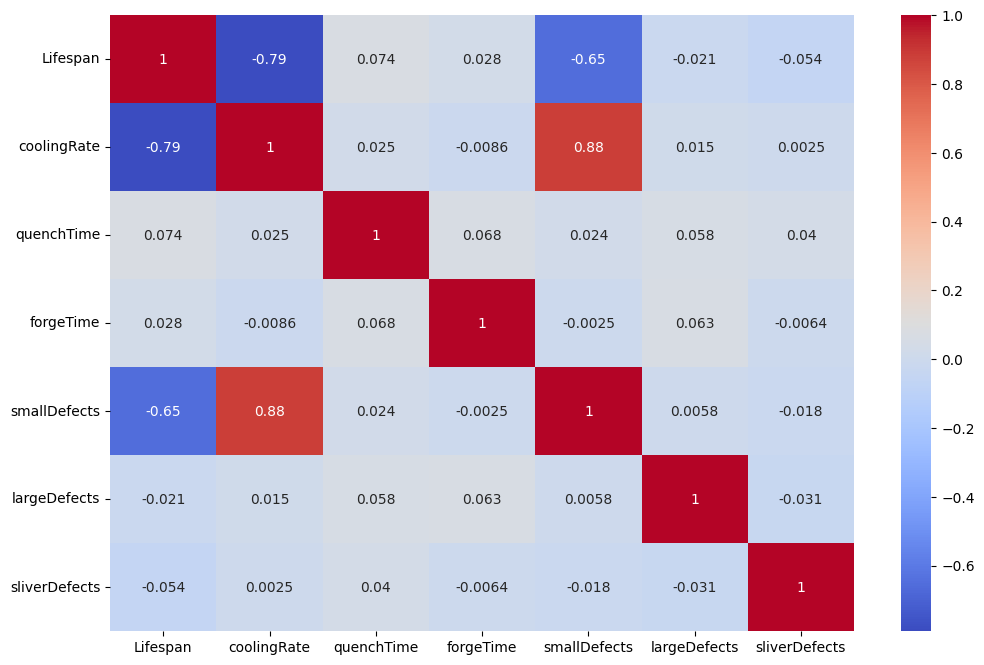

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Load the dataset
df = pd.read_csv('/content/COMP1801_CourseworkDataset1_tabular (1).csv')

# Display basic information about the dataset
print(df.info())

# Display descriptive statistics
print(df.describe())

# Check for missing values in each column
print(df.isnull().sum())

# Correlation analysis
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

**Data Visualization**

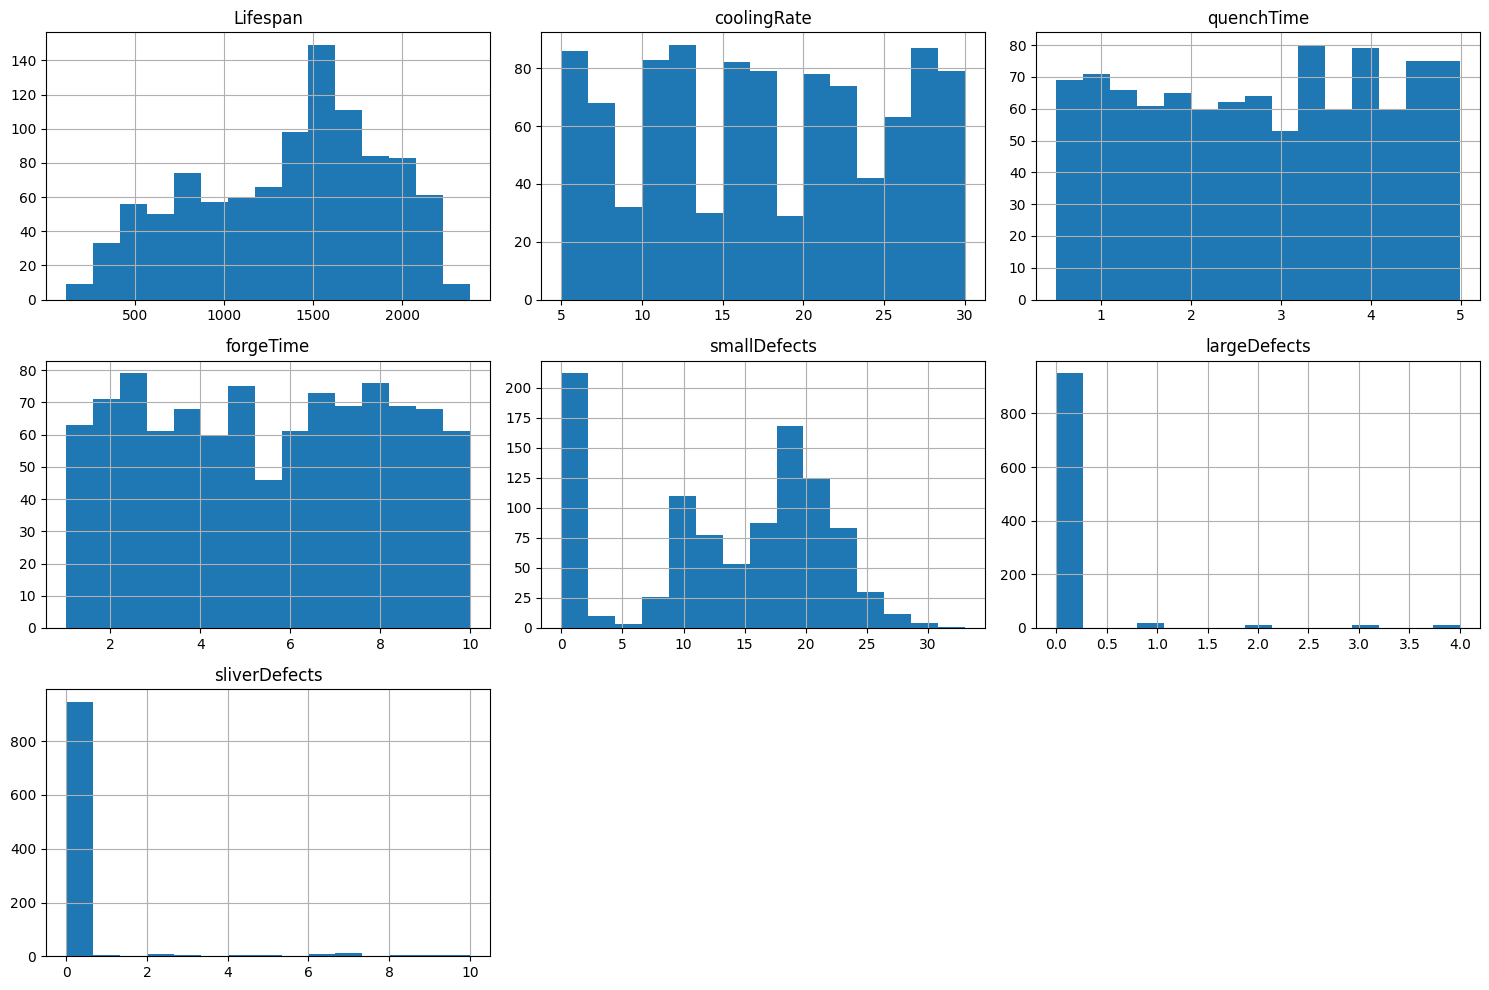

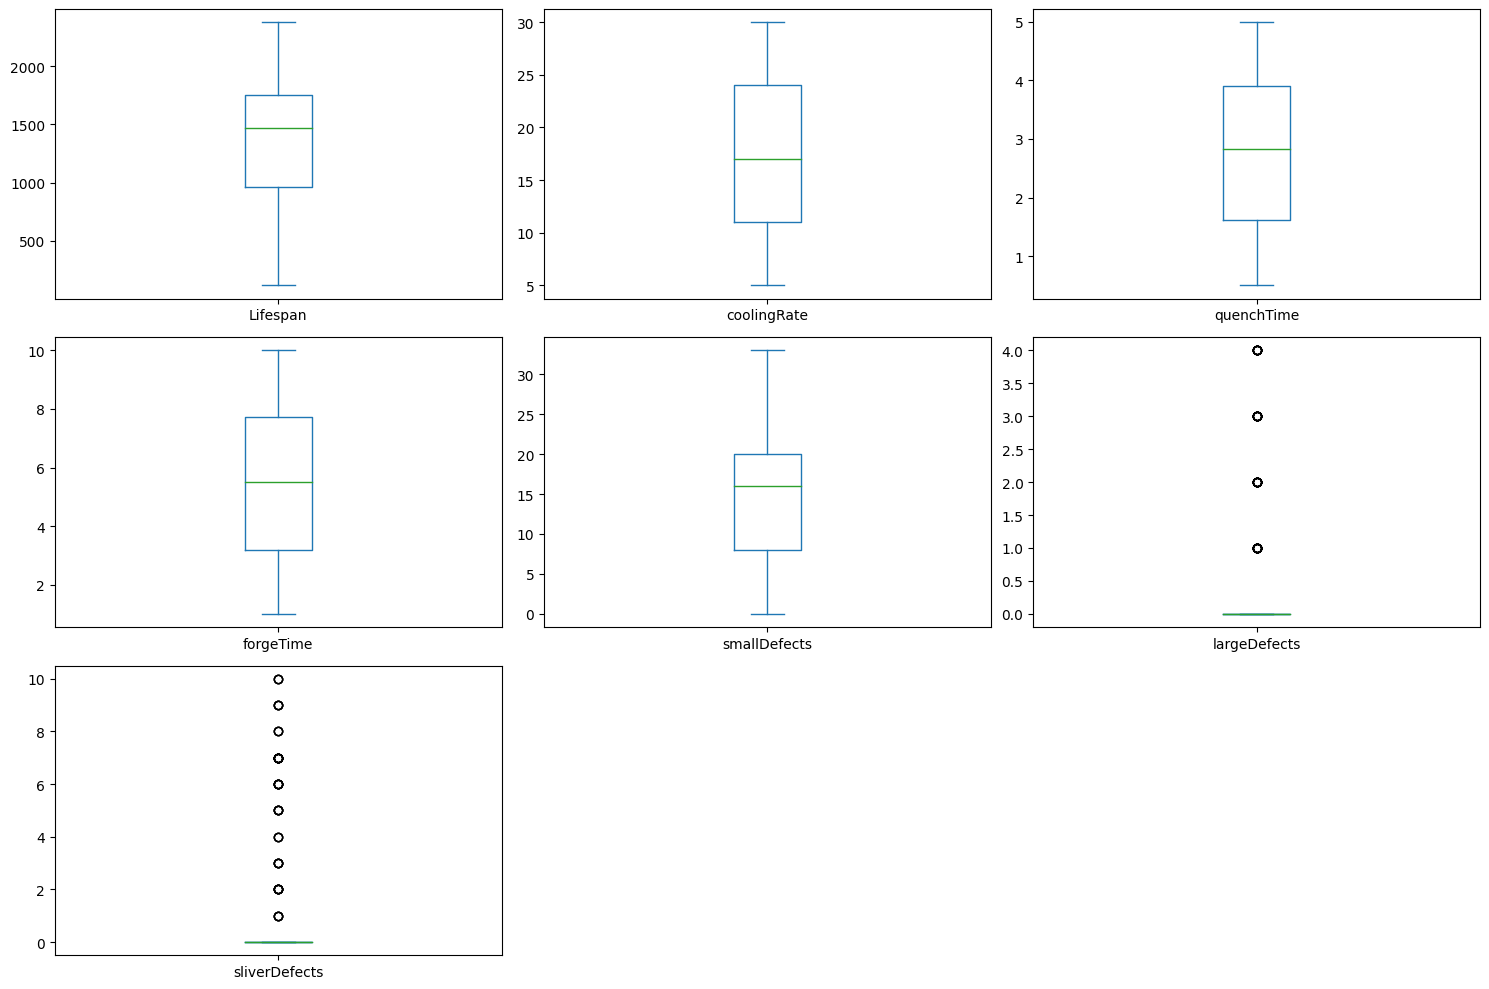

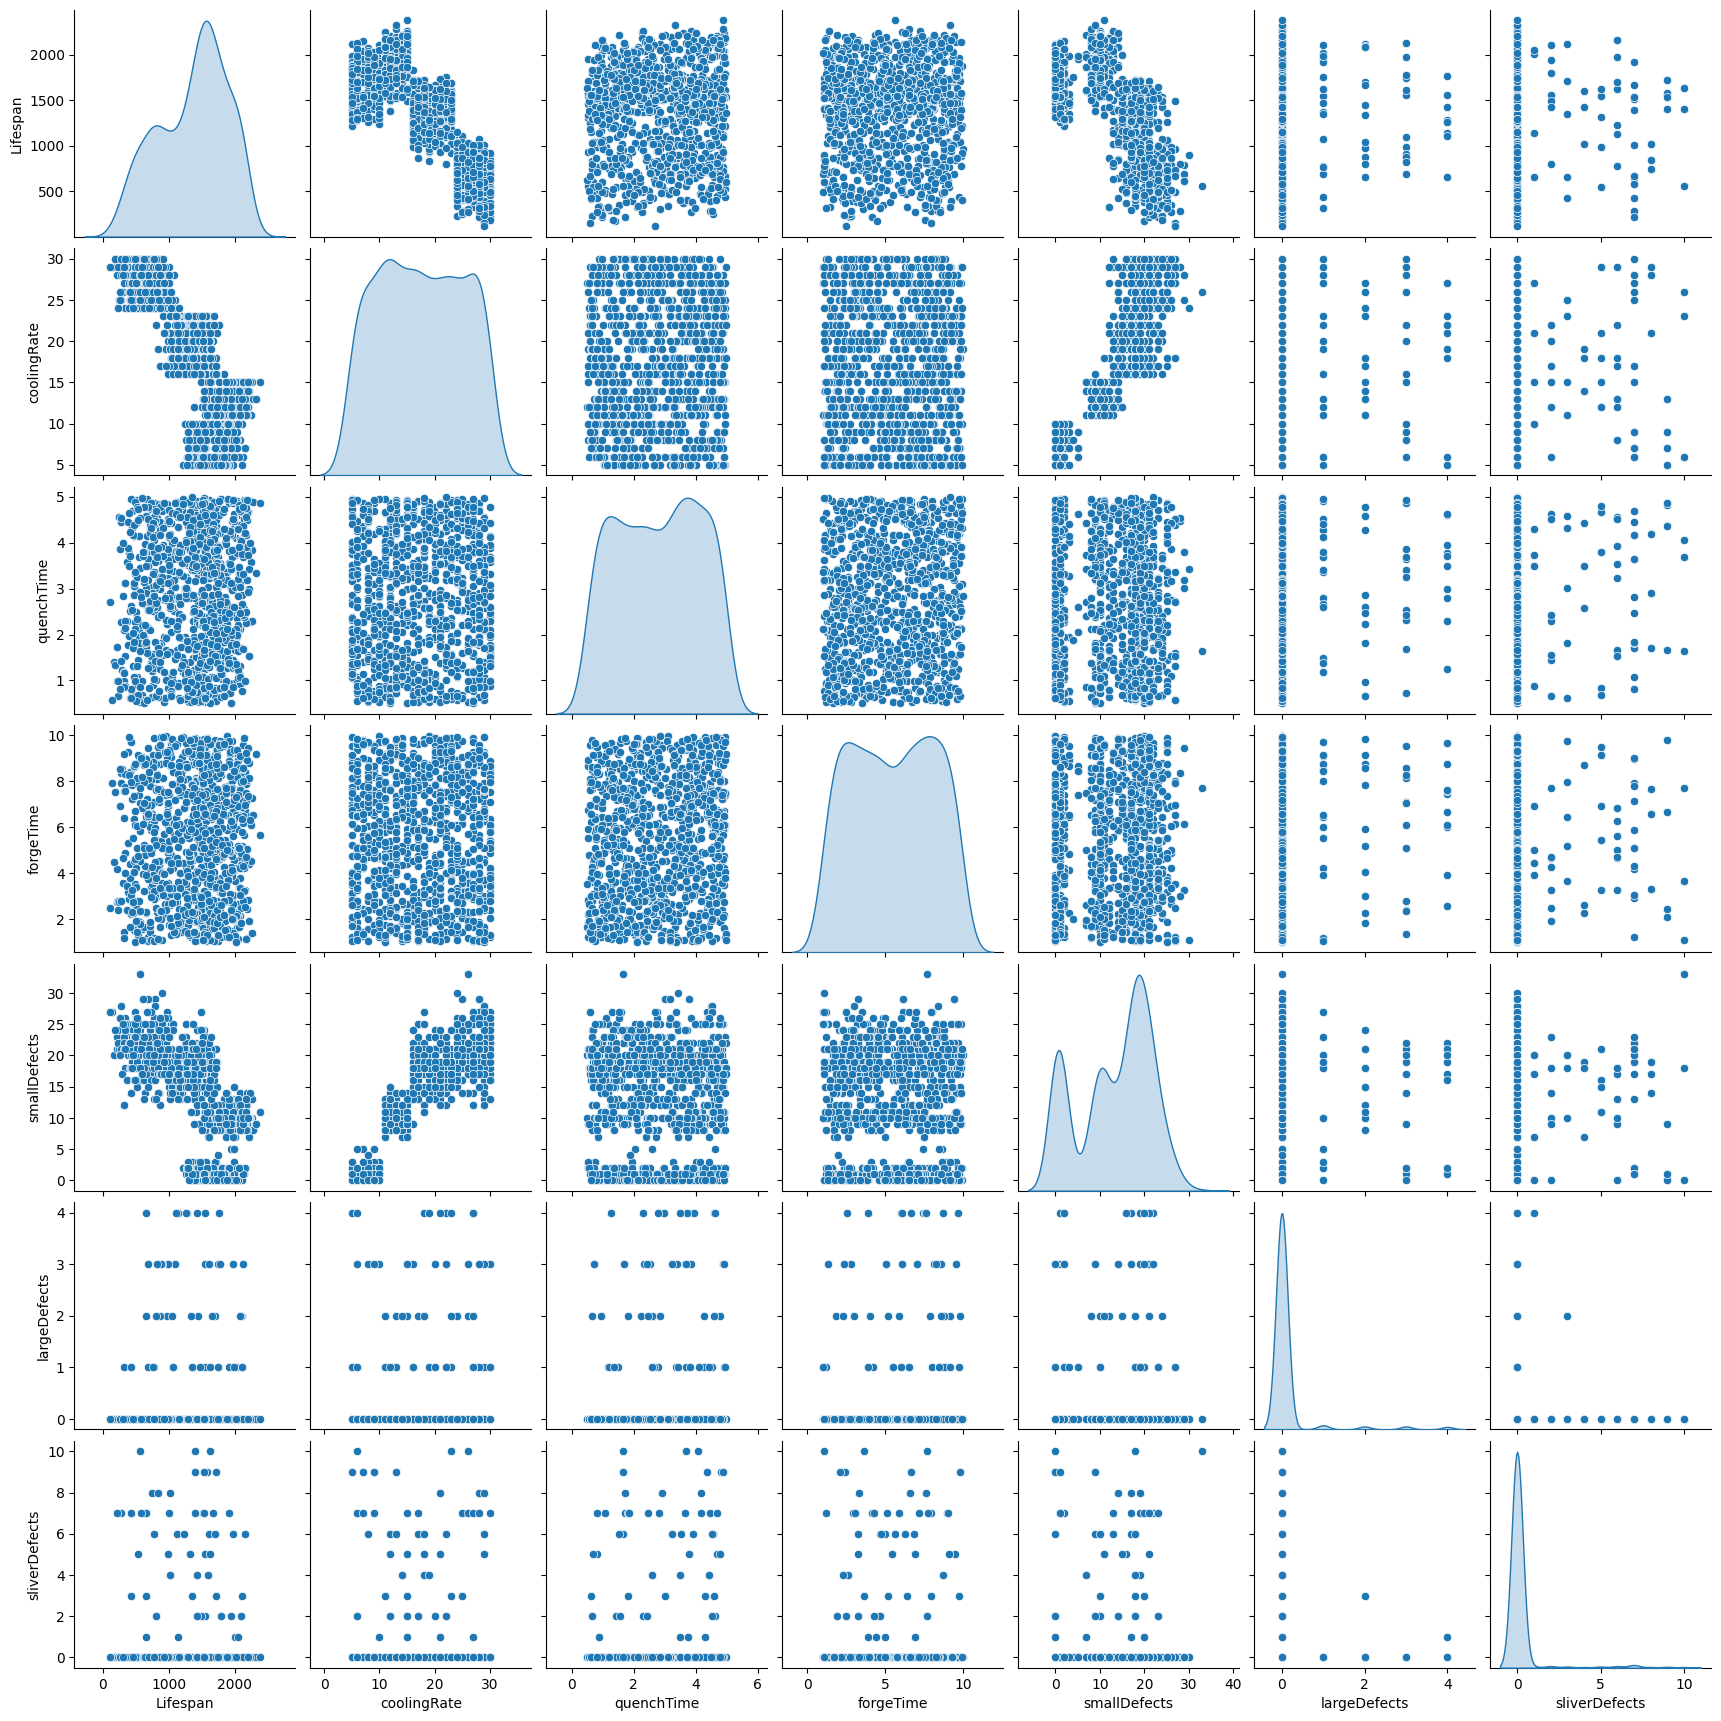

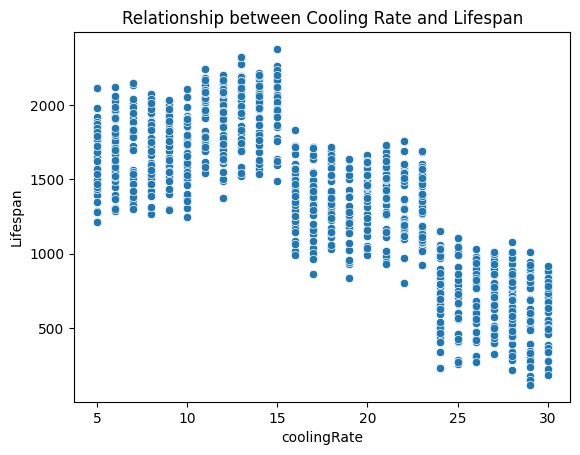

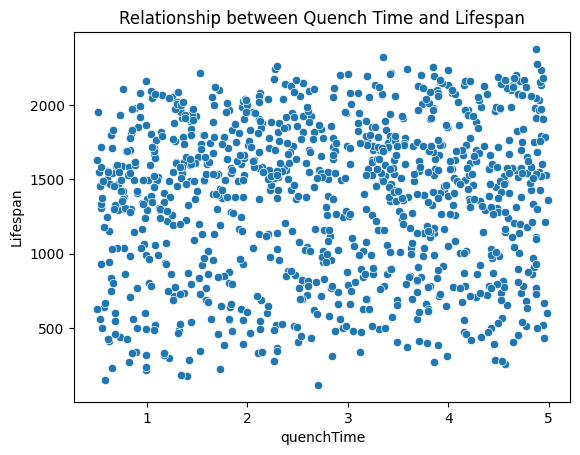

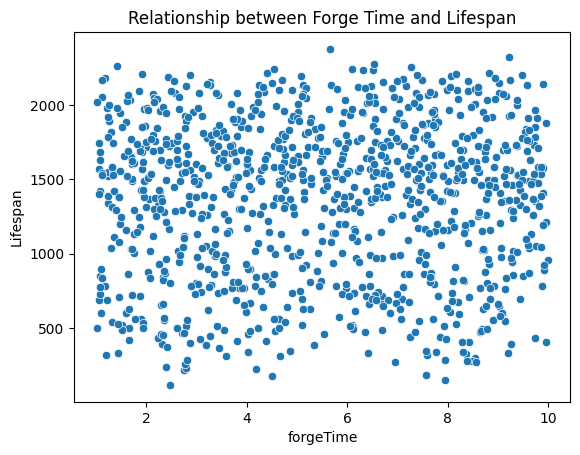

In [ ]:
# Plot histograms for all numerical features
df.hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.tight_layout()
plt.show()

# Plot boxplots for all numerical features
df.plot(kind='box', subplots=True, layout=(3, 3), figsize=(15, 10))
plt.tight_layout()
plt.show()

# Pair plot for a subset of features
sns.pairplot(df, diag_kind='kde')
plt.show()

# Scatter plots showing relationship with Lifespan
sns.scatterplot(data=df, x='coolingRate', y='Lifespan')
plt.title('Relationship between Cooling Rate and Lifespan')
plt.show()

sns.scatterplot(data=df, x='quenchTime', y='Lifespan')
plt.title('Relationship between Quench Time and Lifespan')
plt.show()

sns.scatterplot(data=df, x='forgeTime', y='Lifespan')
plt.title('Relationship between Forge Time and Lifespan')
plt.show()

**Regression Implementation**

Mean Squared Error: 5505.302189210612
Mean Absolute Error: 57.80574994131826
R-squared: 0.9808131965342906


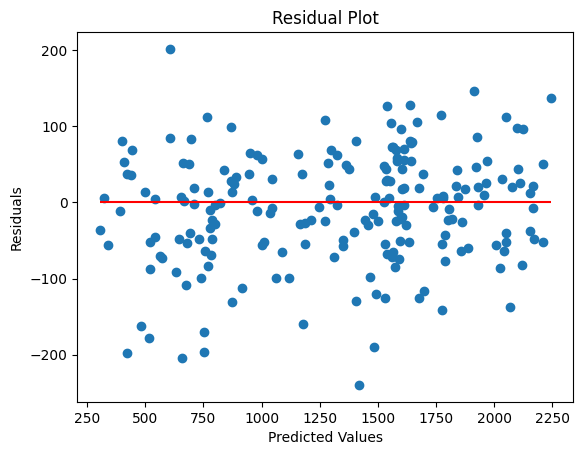

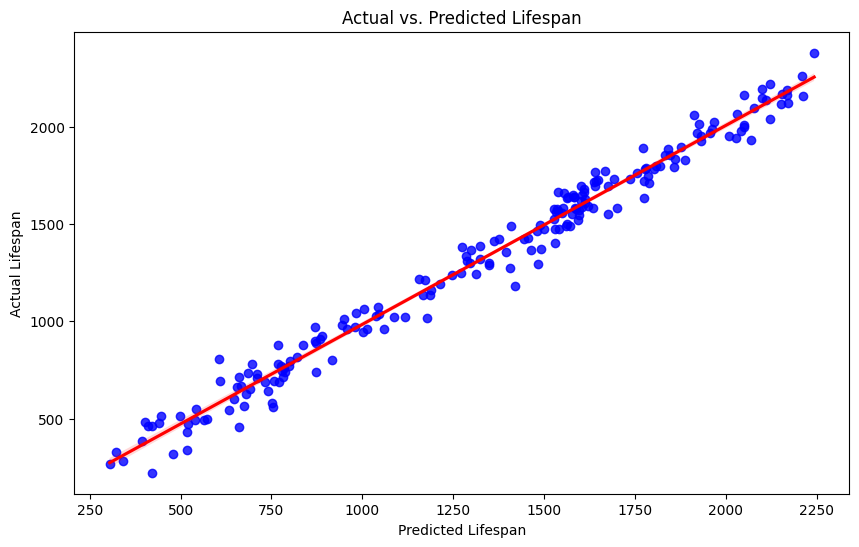

In [ ]:
# Feature selection
X = df[['coolingRate', 'quenchTime', 'forgeTime', 'smallDefects', 'largeDefects', 'sliverDefects', 'partType', 'microstructure', 'seedLocation', 'castType']]
y = df['Lifespan']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling and encoding
numeric_features = ['coolingRate', 'quenchTime', 'forgeTime', 'smallDefects', 'largeDefects', 'sliverDefects']
categorical_features = ['partType', 'microstructure', 'seedLocation', 'castType']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Model selection and training
# Linear Regression
linear_model = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', LinearRegression())])

# Random Forest
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])

# Decision Tree
dt_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', DecisionTreeRegressor())])

# Hyperparameter tuning
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [None, 10, 20],
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best model after tuning
best_model = grid_search.best_estimator_

# Model Evaluation
y_pred = best_model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

# Predicting using the test set
y_pred = best_model.predict(X_test)

# Calculating residuals
residuals = y_test - y_pred

# Plotting the Residuals
plt.scatter(y_pred, residuals)
plt.hlines(y = 0, xmin = y_pred.min(), xmax = y_pred.max(), color = 'red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

plt.figure(figsize=(10,6))
sns.regplot(x=y_pred, y=y_test, fit_reg=True, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel('Predicted Lifespan')
plt.ylabel('Actual Lifespan')
plt.title('Actual vs. Predicted Lifespan')
plt.show()

**Binary Classification Implementation**

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       111
           1       0.86      0.89      0.87        89

    accuracy                           0.89       200
   macro avg       0.88      0.89      0.88       200
weighted avg       0.89      0.89      0.89       200



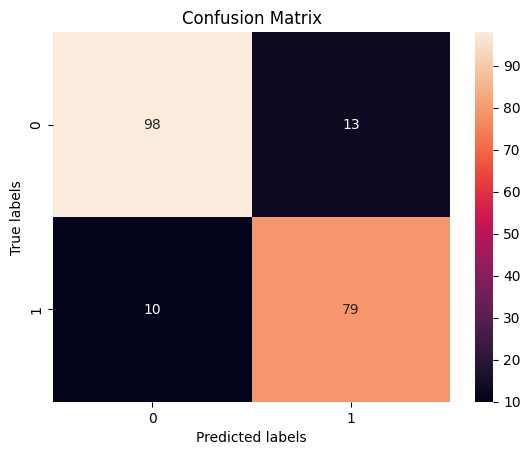

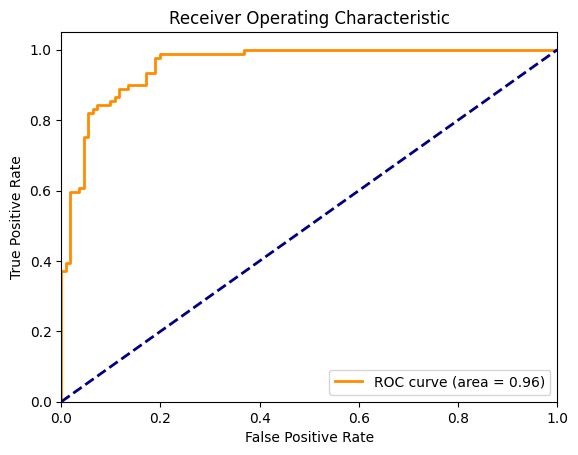

Model: SVM
              precision    recall  f1-score   support

           0       0.93      0.88      0.91       111
           1       0.86      0.92      0.89        89

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



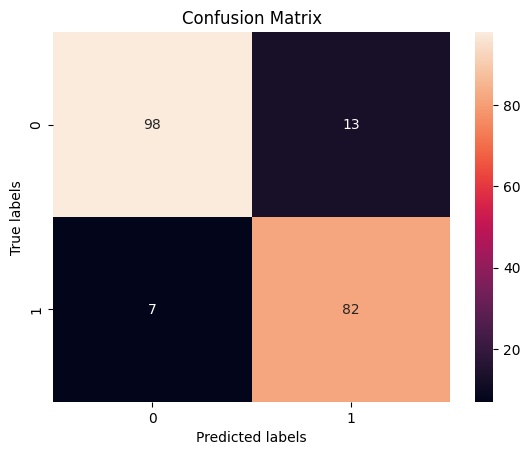

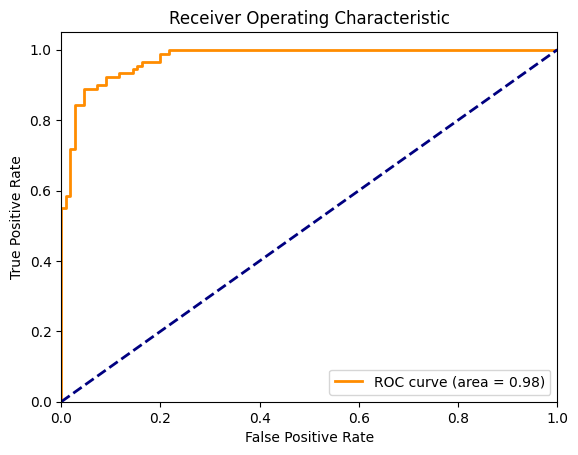

Model: Random Forest
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       111
           1       0.91      0.98      0.94        89

    accuracy                           0.94       200
   macro avg       0.94      0.95      0.94       200
weighted avg       0.95      0.94      0.95       200



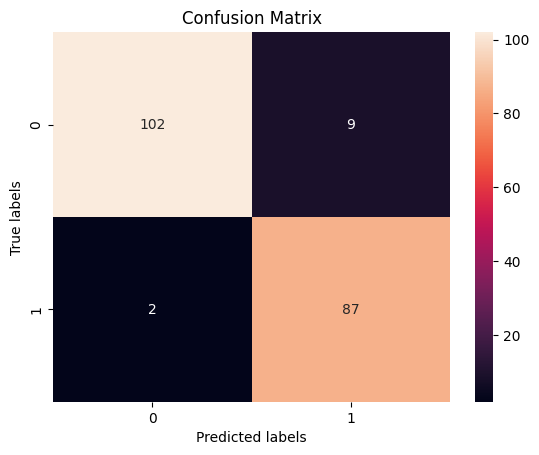

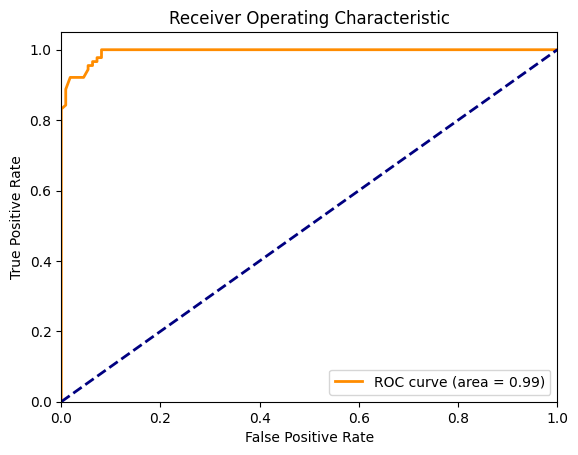

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import classification_report , roc_curve, auc

# Convert 'Lifespan' to binary target
df['is_defective'] = np.where(df['Lifespan'] < 1500, 0, 1)

# Features and target
X = df[['coolingRate', 'quenchTime', 'forgeTime', 'smallDefects', 'largeDefects', 'sliverDefects', 'partType', 'microstructure', 'seedLocation', 'castType']]
y = df['is_defective']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling and encoding
numeric_features = ['coolingRate', 'quenchTime', 'forgeTime', 'smallDefects', 'largeDefects', 'sliverDefects']
categorical_features = ['partType', 'microstructure', 'seedLocation', 'castType']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Define SMOTE for resampling
smote = SMOTE()

# Define the classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier()
}

# Function to run, evaluate, and visualize a model
def run_model(model_name):
    classifier = classifiers[model_name]
    pipeline = ImbPipeline(steps=[('preprocessor', preprocessor),
                                  ('smote', smote),
                                  ('classifier', classifier)])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]

    # Evaluation metrics
    print(f"Model: {model_name}")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='g')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Run and evaluate each model
for model_name in classifiers:
    run_model(model_name)

**Convolutional Neural Network Implementation**

In [25]:
import zipfile
import os

# Path to the zip file and extraction directory
zip_path = '/content/COMP1801_CourseworkDataset2_images (1).zip'
extract_dir = '/content/sample_data/extracted'

# Unzipping the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Dataset unzipped successfully to:", extract_dir)

Dataset unzipped successfully to: /content/sample_data/extracted


In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil

# Load the metadata file
metadata_path = '/content/sample_data/extracted/COMP1801_CourseworkDataset2_images/COMP1801_CourseworkDataset2_images_metadata.csv'
metadata = pd.read_csv(metadata_path)

# Display the first few rows of the dataframe
print(metadata.head())

# Load the metadata file
metadata_path = '/content/COMP1801_CourseworkDataset2_images/COMP1801_CourseworkDataset2_images/COMP1801_CourseworkDataset2_images_metadata.csv'
metadata = pd.read_csv(metadata_path)

# Directory containing the unorganized images
image_dir = '/content/COMP1801_CourseworkDataset2_images/COMP1801_CourseworkDataset2_images'

# Base directory for the organized images
base_dir = '/content/organized_images'
os.makedirs(base_dir, exist_ok=True)

# Iterate over the metadata and organize images
for index, row in metadata.iterrows():
    # Get the defect type (create a 'No Defect' directory for 'None')
    defect_type = row['Type'] if row['Defect'] == 'Yes' else 'No Defect'

    # Create a directory for the defect type if it doesn't exist
    defect_dir = os.path.join(base_dir, defect_type)
    os.makedirs(defect_dir, exist_ok=True)

    # Source and destination paths
    src_path = os.path.join(image_dir, row['Image Filename'])
    dst_path = os.path.join(defect_dir, row['Image Filename'])

    # Copy the image to the new directory
    shutil.copy(src_path, dst_path)

print("Images organized successfully.")

  Image Filename Defect      Type
0     scan_0.png    Yes  Splinter
1     scan_1.png     No      None
2     scan_2.png    Yes  Multiple
3     scan_3.png     No      None
4     scan_4.png     No      None
Images organized successfully.


In [31]:
# Base directory where images are currently organized
base_dir = '/content/organized_images'

# New directories for training and validation sets
train_dir = '/content/train'
validation_dir = '/content/validation'
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

# Get the list of defect types (subdirectories in base_dir)
defect_types = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]

# Split images for each defect type into train and validation sets
for defect in defect_types:
    # Paths for defect type in base, train, and validation directories
    defect_base_dir = os.path.join(base_dir, defect)
    defect_train_dir = os.path.join(train_dir, defect)
    defect_validation_dir = os.path.join(validation_dir, defect)

    # Create subdirectories in train and validation directories
    os.makedirs(defect_train_dir, exist_ok=True)
    os.makedirs(defect_validation_dir, exist_ok=True)

    # List of images for this defect type
    images = [f for f in os.listdir(defect_base_dir) if os.path.isfile(os.path.join(defect_base_dir, f))]

    # Splitting images into train and validation sets
    train_imgs, val_imgs = train_test_split(images, test_size=0.2, random_state=42)

    # Copy images to respective directories
    for img in train_imgs:
        shutil.copy(os.path.join(defect_base_dir, img), os.path.join(defect_train_dir, img))
    for img in val_imgs:
        shutil.copy(os.path.join(defect_base_dir, img), os.path.join(defect_validation_dir, img))

print("Images split into train and validation directories.")

Images split into train and validation directories.


In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation for training data and rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Rescaling for validation data
validation_datagen = ImageDataGenerator(rescale=1./255)

# Data generators for training and validation sets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

Found 799 images belonging to 4 classes.
Found 201 images belonging to 4 classes.


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the CNN Model
history = model.fit(
    train_generator,
    steps_per_epoch=25,  # 799 images = batch_size * steps
    epochs=20,  # Start with 20 epochs, adjust based on performance
    validation_data=validation_generator,
    validation_steps=6)  # 201 images = batch_size * steps

Epoch 1/20
25/25 [==============================] - 67s 3s/step - loss: 1.1140 - accuracy: 0.5632 - val_loss: 0.8045 - val_accuracy: 0.6719
Epoch 2/20
25/25 [==============================] - 46s 2s/step - loss: 0.7349 - accuracy: 0.7922 - val_loss: 0.5681 - val_accuracy: 0.8177
Epoch 3/20
25/25 [==============================] - 58s 2s/step - loss: 0.6153 - accuracy: 0.8160 - val_loss: 0.9455 - val_accuracy: 0.6510
Epoch 4/20
25/25 [==============================] - 49s 2s/step - loss: 0.6496 - accuracy: 0.8110 - val_loss: 0.5165 - val_accuracy: 0.8438
Epoch 5/20
25/25 [==============================] - 47s 2s/step - loss: 0.5639 - accuracy: 0.8310 - val_loss: 0.5088 - val_accuracy: 0.8281
Epoch 6/20
25/25 [==============================] - 46s 2s/step - loss: 0.5184 - accuracy: 0.8423 - val_loss: 0.5151 - val_accuracy: 0.8021
Epoch 7/20
25/25 [==============================] - 47s 2s/step - loss: 0.5079 - accuracy: 0.8498 - val_loss: 0.5930 - val_accuracy: 0.7969
Epoch 8/20
25/25 [==

7/7 [==============================] - 3s 343ms/step - loss: 0.1108 - accuracy: 0.9552
Validation accuracy: 0.96


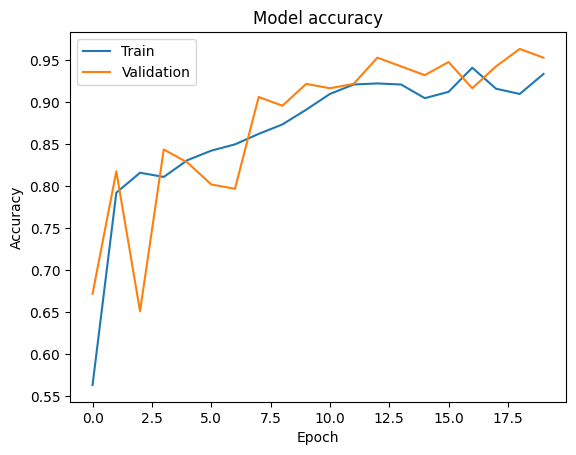

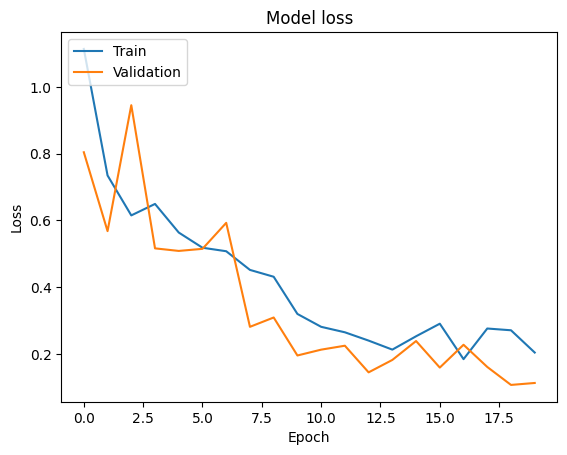

7/7 [==============================] - 4s 590ms/step
              precision    recall  f1-score   support

       Large       0.14      0.09      0.11        11
    Multiple       0.24      0.25      0.25        51
   No Defect       0.57      0.58      0.57       125
    Splinter       0.25      0.21      0.23        14

    accuracy                           0.44       201
   macro avg       0.30      0.28      0.29       201
weighted avg       0.44      0.44      0.44       201



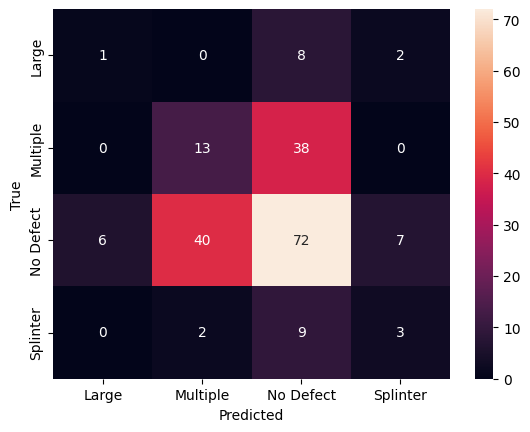

In [34]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation accuracy: {val_accuracy:.2f}')

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Predictions
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

# Confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
sns.heatmap(conf_matrix, annot=True, fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Clustering Implementation**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

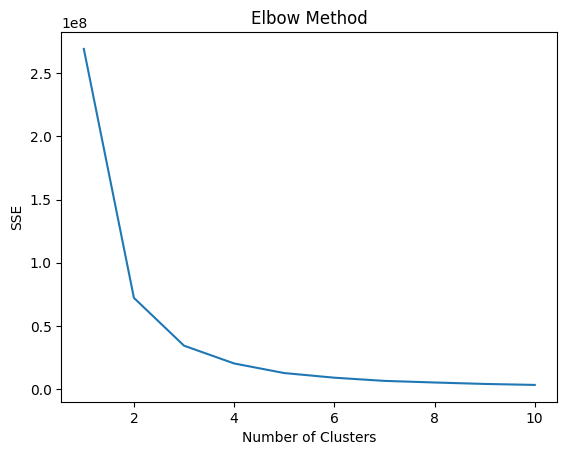

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

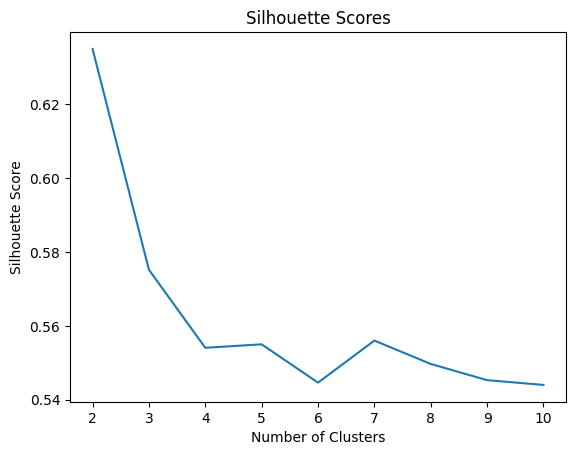

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Select relevant features for clustering
selected_features = df[['Lifespan', 'coolingRate', 'quenchTime', 'forgeTime']]

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Starting with 3 clusters
clusters = kmeans.fit_predict(selected_features)
df['Cluster'] = clusters

# Elbow Method to find the optimal number of clusters
sse = []
for k in range(1, 11):  # Testing k from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(selected_features)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

# Silhouette Score to validate the cluster number
silhouette_scores = []
for k in range(2, 11):  # Silhouette Score needs at least 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(selected_features)
    score = silhouette_score(selected_features, cluster_labels)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [37]:
# Finding the optimal k based on Silhouette Scores
optimal_k_silhouette = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]
print("Optimal number of clusters based on Silhouette Score:", optimal_k_silhouette)

# Final decision on optimal k
optimal_k = optimal_k_silhouette  # Replace or adjust as necessary
print("Chosen optimal number of clusters:", optimal_k)

Optimal number of clusters based on Silhouette Score: 2
Chosen optimal number of clusters: 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


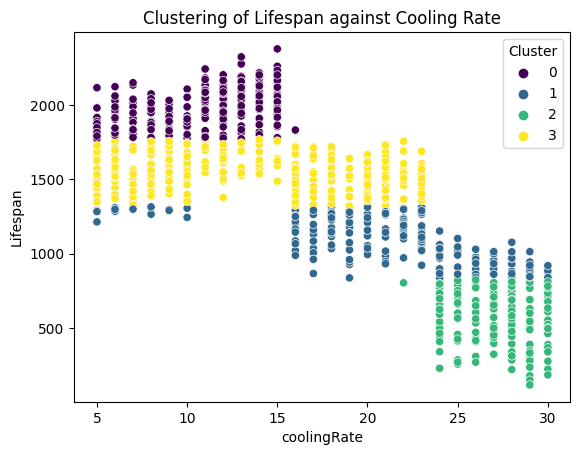

In [38]:
# Re-run K-Means with the optimal number of clusters
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(selected_features)
df['Cluster'] = clusters

# Scatter plot visualization
sns.scatterplot(data=df, x='coolingRate', y='Lifespan', hue='Cluster', palette='viridis')
plt.title('Clustering of Lifespan against Cooling Rate')
plt.show()